In [729]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [731]:
orders_df = pd.read_csv('/Users/mcrandom/Downloads/orders 2.csv')
items_df = pd.read_csv('/Users/mcrandom/Downloads/Items 2.csv')
customers_df = pd.read_csv('/Users/mcrandom/Downloads/customers copy.csv')
order_item_df = pd.read_csv('/Users/mcrandom/Downloads/order_item copy.csv')

In [733]:
orders_df_copy = orders_df.copy()
items_df_copy = items_df.copy()
customers_df_copy = customers_df.copy()
order_item_df_copy = order_item_df.copy()

1. Handle duplicate data in job dataset:
a. In the job dataset, duplicate data is when you find rows with
the same job_title.

In [735]:
duplicated_items = items_df_copy[items_df_copy.duplicated('item_name', keep=False)]
duplicated_items

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
0,1,Television,Televisions and Displays,356.81,1009.0,JBL,True
1,2,Laptop,Computers and Accessories,1851.32,493.0,HP,True
2,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True
3,4,Smartphone,Mobile Devices and Accessories,965.20,201.0,Bose,True
4,5,Tablet,NaN,2739.61,190.0,Toshiba,True
5,6,Printer,Printers and Office Equipment,4175.99,971.0,Sony,True
6,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True
7,8,Headphone,NaN,3117.19,599.0,NaN,True
8,9,Speaker,Audio Equipment,4471.27,1360.0,Toshiba,True
41,42,Television,Televisions and Displays,479.19,670.0,Samsung,True


b. In case you find duplicate data, remove the job with less
information. Make sure you change associations in other
data sets to the duplicated job id so your data will still be
accurate

In [737]:
items_id_map = {8: 49}
items_df_copy.set_index('id', inplace=True)

In [739]:
items_df_copy.drop(items_id_map.keys(), axis=0, inplace=True)

In [741]:
items_df_copy.reset_index('id', inplace=True) ##reseting the index

In [743]:
order_item_df_copy

,Unnamed: 0,id,order_id,item_id,quantity
0,0,1,337,10.0,2
1,1,2,430,27.0,6
2,2,3,430,36.0,2
3,3,4,508,46.0,1
4,4,5,229,27.0,2
...,...,...,...,...,...
995,995,996,594,24.0,2
996,996,997,330,32.0,8
997,997,998,472,10.0,3
998,998,999,222,29.0,1


In [745]:
order_item_df_copy['item_id'] = order_item_df_copy['item_id'].replace(items_id_map)


In [747]:
order_item_df_copy[order_item_df_copy['item_id'] == 8]

,Unnamed: 0,id,order_id,item_id,quantity


In [749]:
customers_df_copy

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
0,1,Eadie,Maffeo,Female,41.0,France,2022-01-11,534-341-9052,emaffeo0@smh.com.au
1,2,Hammad,Brewerton,Male,56.0,Isreal,2022-09-30,999-994-0510,hbrewerton1@discovery.com
2,3,Terrell,Bris,Male,43.0,India,NaN,980-455-5208,tbris2@yale.edu
3,4,Frannie,Morewood,Male,84.0,France,2021-05-26,979-187-1493,fmorewood3@vistaprint.com
4,5,Sophi,Fleet,Female,33.0,Sweden,2021-07-19,991-853-9984,sfleet4@unicef.org
...,...,...,...,...,...,...,...,...,...
495,496,Renado,Monard,Male,53.0,India,NaN,399-472-4819,rmonarddr@yale.edu
496,497,Kalina,Luno,Female,30.0,Italy,2022-10-16,659-768-2522,klunods@friendfeed.com
497,498,Viv,Callander,Female,44.0,France,2021-02-24,447-685-9318,vcallanderdt@icq.com
498,499,Georg,Raper,Male,41.0,Germany,2022-04-24,863-207-4830,graperdu@homestead.com


In [751]:
duplicated_customer = customers_df_copy[customers_df_copy.duplicated('email', keep=False)]
duplicated_customer
##no duplicates

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email


In [752]:
orders_df_copy

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE
...,...,...,...,...,...,...,...
595,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE
596,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE
597,598,480.0,1473 Ilene Drive,4.0,2023-09-11,CASH,STORE
598,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE


In [754]:
missing_data = orders_df_copy.isnull().sum()
total_rows = orders_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Row', 'Percentage Missing'])
final_missing_data

,Total Rows,Missing Row,Percentage Missing
order_id,600,0,0.0
customer_id,600,45,7.5
delivery_address,600,0,0.0
delivery_days,600,75,12.5
order_date,600,0,0.0
payment_method,600,0,0.0
order_source,600,0,0.0


In [757]:
orders_df_copy['delivery_days'] = orders_df_copy['delivery_days'].fillna(round(orders_df_copy['delivery_days'].mean()))
orders_df_copy.dropna(subset=['customer_id'], inplace=True)

In [759]:
order_item_df_copy = order_item_df_copy[order_item_df_copy['order_id'].isin(orders_df_copy['order_id'])]

orders_df_copy
items_df_copy
customers_df_copy
order_item_df_copy

In [762]:
items_df_copy

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
0,1,Television,Televisions and Displays,356.81,1009.0,JBL,True
1,2,Laptop,Computers and Accessories,1851.32,493.0,HP,True
2,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True
3,4,Smartphone,Mobile Devices and Accessories,965.20,201.0,Bose,True
4,5,Tablet,NaN,2739.61,190.0,Toshiba,True
5,6,Printer,Printers and Office Equipment,4175.99,971.0,Sony,True
6,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True
7,9,Speaker,Audio Equipment,4471.27,1360.0,Toshiba,True
8,10,DVD Player,Video Players and Recorders,453.85,605.0,NaN,True
9,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True


In [764]:
missing_data = items_df_copy.isnull().sum()
total_rows = items_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Row', 'Percentage Missing'])
final_missing_data

,Total Rows,Missing Row,Percentage Missing
id,49,0,0.000000
item_name,49,0,0.000000
item_category,49,7,14.285714
item_price,49,0,0.000000
stock_quantity,49,5,10.204082
item_brand,49,2,4.081633
item_availability,49,0,0.000000


In [766]:
items_df_copy['item_category'] = items_df_copy['item_category'].fillna('Unknown')
items_df_copy['stock_quantity'] = items_df_copy['stock_quantity'].fillna('Unknown')
items_df_copy.dropna(subset=['item_brand'], inplace=True)

In [768]:
order_item_df_copy = order_item_df_copy[order_item_df_copy['item_id'].isin(items_df_copy['id'])]

In [770]:
order_item_df_copy

,Unnamed: 0,id,order_id,item_id,quantity
1,1,2,430,27.0,6
2,2,3,430,36.0,2
3,3,4,508,46.0,1
4,4,5,229,27.0,2
5,5,6,69,50.0,1
...,...,...,...,...,...
993,993,994,535,24.0,3
994,994,995,483,35.0,4
995,995,996,594,24.0,2
996,996,997,330,32.0,8


In [772]:
missing_data = customers_df_copy.isnull().sum()
total_rows = customers_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Row', 'Percentage Missing'])
final_missing_data

,Total Rows,Missing Row,Percentage Missing
id,500,0,0.0
first_name,500,0,0.0
last_name,500,0,0.0
gender,500,53,10.6
age,500,25,5.0
nationallity,500,0,0.0
joining_date,500,61,12.2
phone_number,500,0,0.0
email,500,0,0.0


In [774]:
customers_df_copy['gender'] = customers_df_copy['gender'].fillna('Unknown')
customers_df_copy['age'] = customers_df_copy['age'].fillna(round(customers_df_copy['age'].mean()))

In [776]:
customers_df_copy['joining_date'] = pd.to_datetime(customers_df_copy['joining_date'])## converting to datetime
customers_df_copy['joining_date'].mean()

Timestamp('2021-07-28 15:28:17.494305024')

In [778]:
customers_df_copy['joining_date'].fillna(pd.to_datetime('1970-01-01'), inplace=True)

/var/folders/n_/gjr5vm515r30lns9lx2wd0140000gn/T/ipykernel_10576/3354669874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df_copy['joining_date'].fillna(pd.to_datetime('1970-01-01'), inplace=True)


In [780]:
customers_df_copy['joining_date']

0     2022-01-11
1     2022-09-30
2     1970-01-01
3     2021-05-26
4     2021-07-19
         ...    
495   1970-01-01
496   2022-10-16
497   2021-02-24
498   2022-04-24
499   2021-08-06
Name: joining_date, Length: 500, dtype: datetime64[ns]

In [782]:
##customers_df_copy['joining_date'].fillna(customers_df_copy['joining_date'].mean(), inplace=True)

orders_df_copy
items_df_copy
customers_df_copy
order_item_df_copy

In [785]:
missing_data = order_item_df_copy.isnull().sum()
total_rows = order_item_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Row', 'Percentage Missing'])
final_missing_data

,Total Rows,Missing Row,Percentage Missing
Unnamed: 0,866,0,0.0
id,866,0,0.0
order_id,866,0,0.0
item_id,866,0,0.0
quantity,866,0,0.0


In [787]:
##data analysis
gender_customer_count = customers_df_copy.groupby('gender').size()
gender_customer_count = gender_customer_count.reset_index(name='gender_count')
gender_customer_count

,gender,gender_count
0,Agender,13
1,Bigender,5
2,Female,203
3,Genderfluid,12
4,Genderqueer,5
5,Male,196
6,Non-binary,7
7,Polygender,6
8,Unknown,53


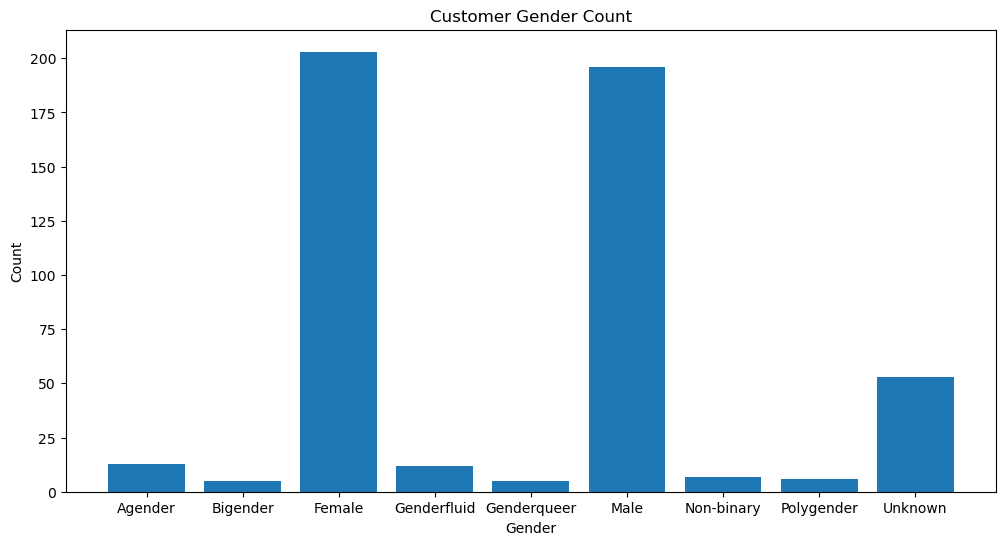

In [789]:
plt.figure(figsize=(12,6))
plt.bar(gender_customer_count['gender'], gender_customer_count['gender_count'])
plt.title('Customer Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

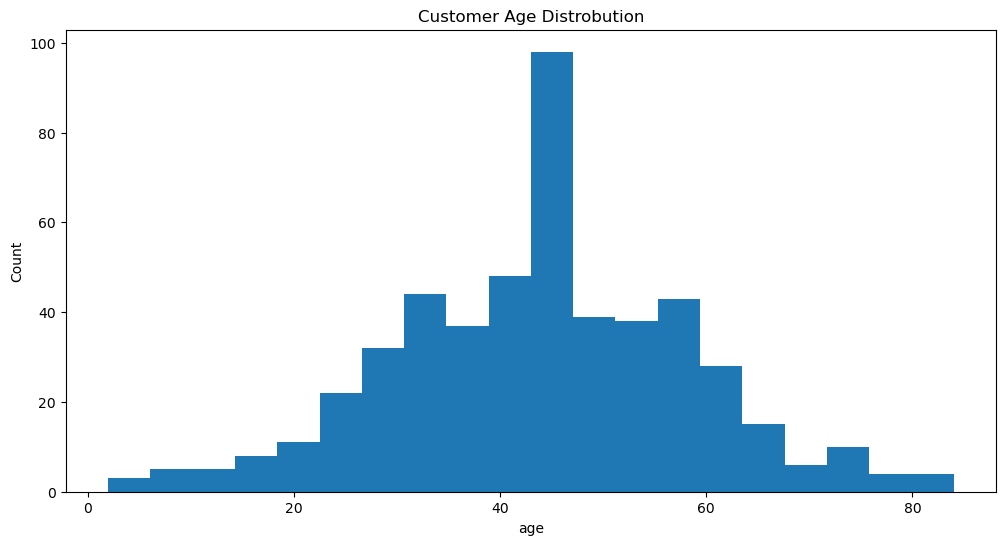

In [790]:
plt.figure(figsize=(12,6))
plt.hist(customers_df_copy['age'], bins=20)
plt.title('Customer Age Distrobution')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

In [792]:
filtered_customer_df = customers_df_copy[customers_df_copy['joining_date'] != pd.to_datetime('1970-01-01')]


In [795]:
filtered_customer_df['joining_year'] = filtered_customer_df['joining_date'].dt.year
joining_year_count = filtered_customer_df.groupby('joining_year').size()
joining_year_count = joining_year_count.reset_index(name='year_count')
top_year = joining_year_count.loc[joining_year_count['year_count'].idxmax()]
print(f"the year with the most joining customes is {top_year['joining_year']} with {top_year['year_count']} new customers")

the year with the most joining customes is 2022 with 163 new customers


/var/folders/n_/gjr5vm515r30lns9lx2wd0140000gn/T/ipykernel_10576/3365015200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_customer_df['joining_year'] = filtered_customer_df['joining_date'].dt.year


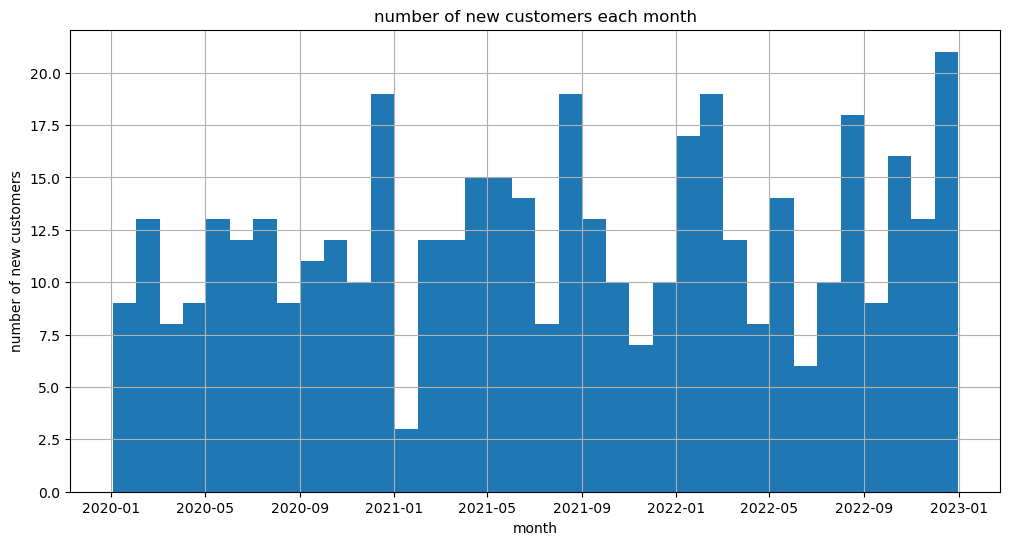

In [797]:
# Create a figure with size 12x6 inches
plt.figure(figsize=(12,6))
# Plot the number of courses over time with circular markers
plt.hist(filtered_customer_df['joining_date'], bins=36)
# Add a title to the plot
plt.title('number of new customers each month')
# Label the x-axis
plt.xlabel('month')
# Label the y-axis
plt.ylabel('number of new customers')
# Add a grid to the plot for better readability
plt.grid()
# Display the plot
plt.show()

In [798]:
print("data seems to be pretty consistant with more spikes during the end of years")

data seems to be pretty consistant with more spikes during the end of years


In [801]:
filtered_customer_df['joining_month'] = filtered_customer_df['joining_date'].dt.month
joining_month_count = filtered_customer_df.groupby('joining_month').size()
joining_month_count = joining_month_count.reset_index(name='month_count')
joining_month_count

/var/folders/n_/gjr5vm515r30lns9lx2wd0140000gn/T/ipykernel_10576/741434036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_customer_df['joining_month'] = filtered_customer_df['joining_date'].dt.month


,joining_month,month_count
0,1,29
1,2,43
2,3,30
3,4,34
4,5,40
5,6,34
6,7,29
7,8,48
8,9,34
9,10,36


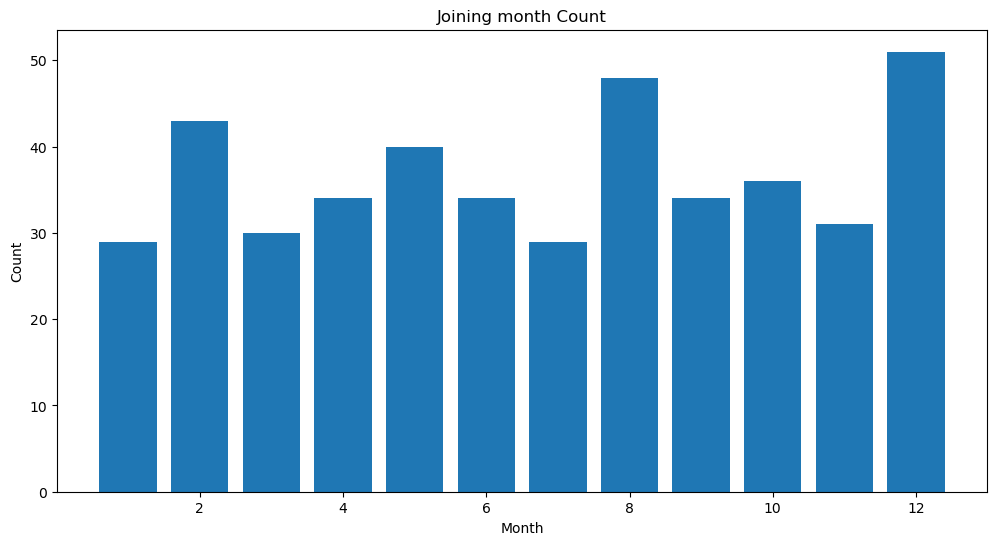

In [803]:
plt.figure(figsize=(12,6))
plt.bar(joining_month_count['joining_month'], joining_month_count['month_count'])
plt.title('Joining month Count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [805]:
print("there seems to be an increase in joining customers in months of December, August. Suggestion an increase of new customers during end of years.")

there seems to be an increase in joining customers in months of December, August. Suggestion an increase of new customers during end of years.


In [807]:
items_df_copy

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
0,1,Television,Televisions and Displays,356.81,1009.0,JBL,True
1,2,Laptop,Computers and Accessories,1851.32,493.0,HP,True
2,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True
3,4,Smartphone,Mobile Devices and Accessories,965.20,201.0,Bose,True
4,5,Tablet,Unknown,2739.61,190.0,Toshiba,True
5,6,Printer,Printers and Office Equipment,4175.99,971.0,Sony,True
6,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True
7,9,Speaker,Audio Equipment,4471.27,1360.0,Toshiba,True
9,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True
10,12,Video Game Console,Gaming Equipment,689.61,753.0,Microsoft,True


In [809]:
item_cat_count = items_df_copy.groupby('item_category').size()
item_cat_count = item_cat_count.reset_index(name='item_count')
item_cat_count

,item_category,item_count
0,Audio Equipment,3
1,Cables,1
2,Computers and Accessories,8
3,Gaming Equipment,2
4,Mobile Devices and Accessories,7
5,Network Equipment,1
6,Photography Equipment,6
7,Printers and Office Equipment,6
8,Storage Devices,1
9,Televisions and Displays,4


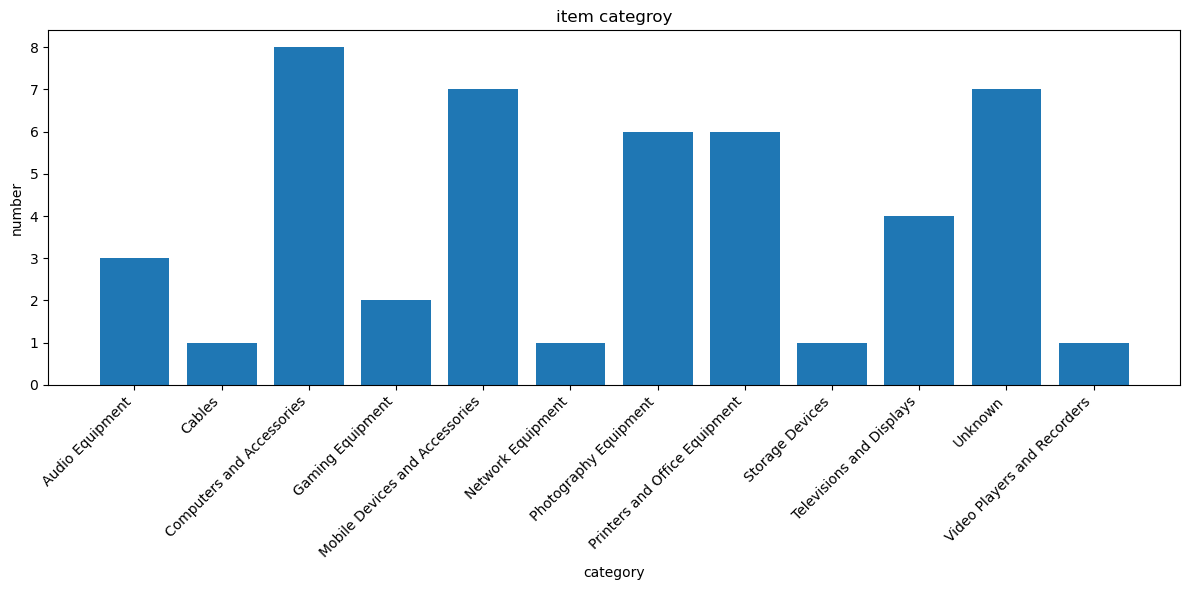

In [811]:

plt.figure(figsize=(12, 6))

# Create a bar chart showing the count of courses by category
plt.bar( item_cat_count['item_category'], item_cat_count['item_count'])
# Add a title to the plot
plt.title('item categroy')
# Label the x-axis
plt.xlabel('category')
# Label the y-axis
plt.ylabel('number')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them
plt.tight_layout()
plt.show()

In [812]:
item_stock_count_filt = items_df_copy[items_df_copy['stock_quantity'] != 'Unknown']
item_stock_count_filt = item_stock_count_filt[['item_name', 'stock_quantity']]
item_stock_count_filt = item_stock_count_filt.groupby('stock_quantity').max()
item_stock_count_filt = item_stock_count_filt.reset_index()
largest_item_stock = item_stock_count_filt.iloc[0]
lowest_item_stock = item_stock_count_filt.iloc[-1]
print(f"""the item with largest stock is {largest_item_stock['item_name']} with {int(largest_item_stock['stock_quantity'])} items in stock.
and the item with lowest stock is {lowest_item_stock['item_name']} with {int(lowest_item_stock['stock_quantity'])} items in stock.""")

the item with largest stock is Wi-Fi Router with 14 items in stock.
and the item with lowest stock is VR Headset with 1367 items in stock.


In [815]:
print(f""" The mean quantity in stock of all items is {item_stock_count_filt['stock_quantity'].mean()}""")

 The mean quantity in stock of all items is 750.8095238095239


In [817]:
order_count_df = orders_df_copy.groupby('customer_id').size()
order_count_df = order_count_df.reset_index(name='order_count')
order_count = order_count_df.groupby('order_count').size()
order_count = order_count.reset_index(name='amount_customers')
order_count

,order_count,amount_customers
0,1,162
1,2,103
2,3,47
3,4,9
4,5,2


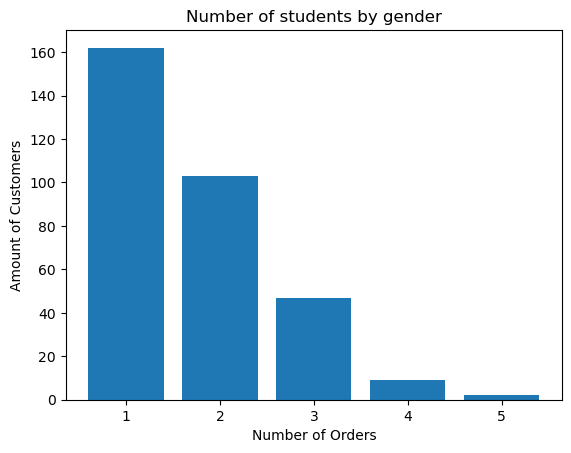

In [819]:
plt.bar(order_count['order_count'], order_count['amount_customers'])
plt.title('Number of students by gender')
plt.xlabel('Number of Orders')
plt.ylabel('Amount of Customers')
plt.show()

In [821]:
top_customers_id = order_count_df.sort_values(by='order_count', ascending=False).head(5)
top_customers_id

,customer_id,order_count
85,138.0,5
35,59.0,5
93,151.0,4
130,204.0,4
39,63.0,4


In [823]:
top_customers_named = top_customers_id.merge(customers_df_copy, left_on='customer_id', right_on='id', how='left')
top_customers_named[['first_name', 'last_name', 'order_count']]

,first_name,last_name,order_count
0,Ellary,Ledner,5
1,Merill,Lacroutz,5
2,Giorgio,Mence,4
3,Sharon,Wilby,4
4,Dorine,Cauldfield,4


In [825]:
orders_df_copy

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE
...,...,...,...,...,...,...,...
595,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE
596,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE
597,598,480.0,1473 Ilene Drive,4.0,2023-09-11,CASH,STORE
598,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE


In [827]:
payment_count = orders_df_copy.groupby('payment_method').size()
payment_count = payment_count.reset_index(name='amount_of_customers')
payment_count

,payment_method,amount_of_customers
0,CASH,146
1,CHECK,136
2,CREDIT_CARD,138
3,GIFT_CARD,135


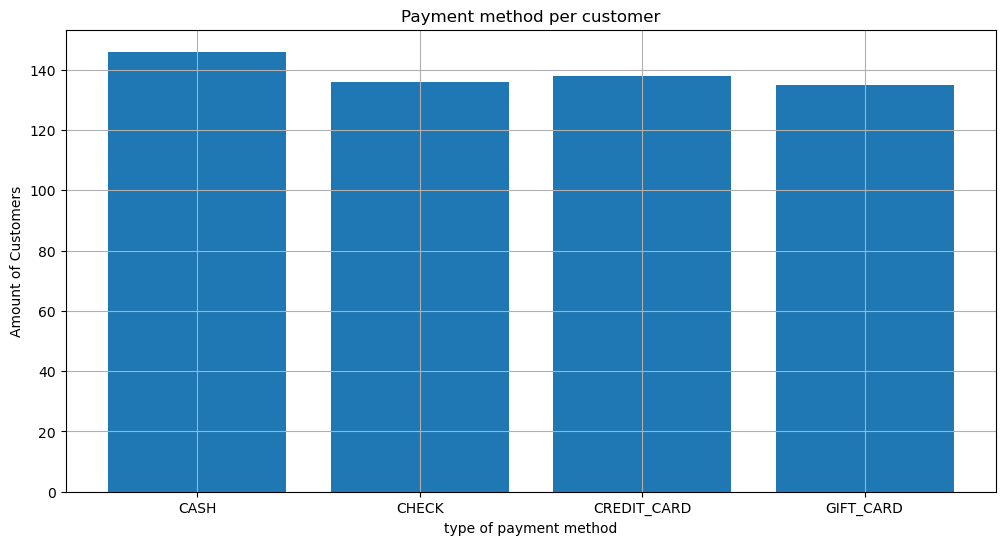

In [829]:
plt.figure(figsize=(12,6))
plt.bar(payment_count['payment_method'], payment_count['amount_of_customers'])
plt.title('Payment method per customer')
plt.xlabel('type of payment method')
plt.ylabel('Amount of Customers')
plt.grid()
plt.show()

In [831]:
order_items_with_price = order_item_df_copy.merge(items_df_copy[['id', 'item_price']], left_on='item_id', right_on='id')
order_items_with_price

,Unnamed: 0,id_x,order_id,item_id,quantity,id_y,item_price
0,1,2,430,27.0,6,27,1283.99
1,2,3,430,36.0,2,36,3256.88
2,3,4,508,46.0,1,46,1606.65
3,4,5,229,27.0,2,27,1283.99
4,5,6,69,50.0,1,50,4453.90
...,...,...,...,...,...,...,...
861,993,994,535,24.0,3,24,4449.99
862,994,995,483,35.0,4,35,3812.53
863,995,996,594,24.0,2,24,4449.99
864,996,997,330,32.0,8,32,1523.27


In [833]:
order_items_with_price['item_total'] = order_items_with_price['quantity'] * order_items_with_price['item_price']
order_items_with_price

,Unnamed: 0,id_x,order_id,item_id,quantity,id_y,item_price,item_total
0,1,2,430,27.0,6,27,1283.99,7703.94
1,2,3,430,36.0,2,36,3256.88,6513.76
2,3,4,508,46.0,1,46,1606.65,1606.65
3,4,5,229,27.0,2,27,1283.99,2567.98
4,5,6,69,50.0,1,50,4453.90,4453.90
...,...,...,...,...,...,...,...,...
861,993,994,535,24.0,3,24,4449.99,13349.97
862,994,995,483,35.0,4,35,3812.53,15250.12
863,995,996,594,24.0,2,24,4449.99,8899.98
864,996,997,330,32.0,8,32,1523.27,12186.16


In [835]:
order_totals = order_items_with_price.groupby('order_id')['item_total'].sum().reset_index(name='total_price')
order_totals

,order_id,total_price
0,1,8554.20
1,2,10148.58
2,3,6843.36
3,4,965.20
4,5,63944.94
...,...,...
398,593,2301.74
399,594,54186.82
400,596,5270.24
401,597,1710.84


In [837]:
orders_df_copy = orders_df_copy.merge(order_totals, on='order_id', how='left')

In [854]:
orders_df_copy.loc[orders_df_copy['order_id'] == 430]

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,total_price
396,430,56.0,1350 Memorial Alley,4.0,2023-07-02,CHECK,STORE,30263.38


In [868]:
orders_df_copy

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,total_price
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE,8554.20
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE,10148.58
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE,6843.36
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE,965.20
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE,63944.94
...,...,...,...,...,...,...,...,...
550,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE,5270.24
551,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE,1710.84
552,598,480.0,1473 Ilene Drive,4.0,2023-09-11,CASH,STORE,NaN
553,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE,29979.05


In [862]:
print(f"""The max price of total price is {int(orders_df_copy['total_price'].max())}, the min price is {int(orders_df_copy['total_price'].min())}.
the mean price is {int(orders_df_copy['total_price'].mean())}""")

The max price of total price is 69581, the min price is 241.
the mean price is 14088


In [872]:
delivery_time_df = orders_df_copy.merge(order_items_with_price[['order_id', 'quantity']], on='order_id')

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,total_price,quantity
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE,8554.20,5
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE,10148.58,3
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE,6843.36,4
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE,965.20,1
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE,63944.94,6
...,...,...,...,...,...,...,...,...,...
861,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE,5270.24,4
862,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE,1710.84,1
863,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE,29979.05,7
864,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE,29979.05,5


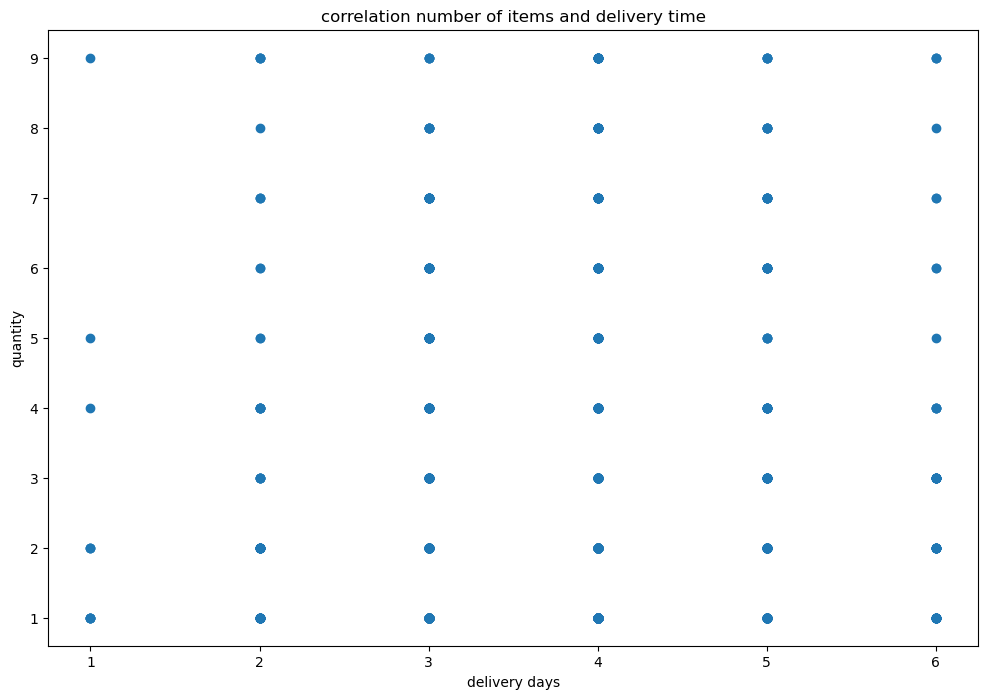

In [888]:
plt.figure(figsize=(12,8))
plt.scatter(delivery_time_df['delivery_days'], delivery_time_df['quantity'])
plt.title('correlation number of items and delivery time')
plt.xlabel('delivery days')
plt.ylabel('quantity')
plt.show()

In [890]:
print("there is no correlation between number of items and delivery days")

there is no correlation between number of items and delivery days


In [906]:
customers_no_order = customers_df_copy[~customers_df_copy['id'].isin(orders_df_copy['customer_id'])]
customers_no_order

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
1,2,Hammad,Brewerton,Male,56.0,Isreal,2022-09-30,999-994-0510,hbrewerton1@discovery.com
2,3,Terrell,Bris,Male,43.0,India,1970-01-01,980-455-5208,tbris2@yale.edu
5,6,Janine,Voak,Female,52.0,United States,2020-08-02,589-929-6244,jvoak5@php.net
6,7,Tori,Hawtin,Female,32.0,United States,2020-08-02,185-689-8980,thawtin6@accuweather.com
7,8,Matthus,Gethouse,Male,15.0,Isreal,2022-02-13,384-333-1747,mgethouse7@zdnet.com
...,...,...,...,...,...,...,...,...,...
487,488,Baldwin,Troman,Male,24.0,Spain,1970-01-01,724-864-0650,btromandj@wikimedia.org
488,489,Boycie,Granger,Male,53.0,Brazil,1970-01-01,522-682-1435,bgrangerdk@guardian.co.uk
489,490,Melissa,Josebury,Female,57.0,France,2022-05-09,742-801-8178,mjoseburydl@artisteer.com
494,495,Reinold,MacLeese,Male,39.0,Brazil,2022-01-09,129-480-3270,rmacleesedq@chronoengine.com


In [922]:
a = order_items_with_price.groupby('item_id')['quantity'].sum().reset_index(name='count')
a = a.sort_values(by='count').head(5)


KeyError: 'id'

In [926]:
a = a.merge(items_df_copy[['id', 'item_name']], left_on='item_id', right_on='id', how='left')


In [930]:
a[['item_name', 'count']]

,item_name,count
0,Webcam,24
1,Surge Protector,25
2,External Hard Drive,29
3,Printer,31
4,CCTV Camera,32
